# Titanic Data set from Kaggle

### Importing important libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

Reading csv from data folder

In [3]:
df = pd.read_csv('data/titanic_train.csv')

###### head selects top 5 rows in case of no argument passed

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### tail selects bottom 5 rows in case of no argument passed

In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
df.drop('Cabin', axis = 1, inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


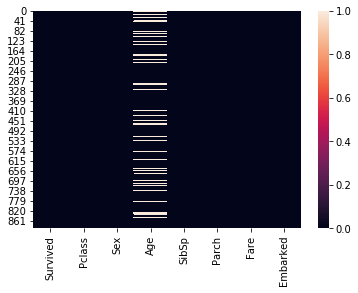

In [9]:
sns.heatmap(df.isna())

In [19]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
type(df.groupby('Pclass')['Age'].mean())

pandas.core.series.Series

In [18]:
s[3]

25.14061971830986

In [26]:
def impute_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return 38
        elif row['Pclass'] == 2:
            return 29
        else:
            return 25
    else:
        return row['Age']

In [27]:
df['Age'] = df.apply(impute_age, axis=1)

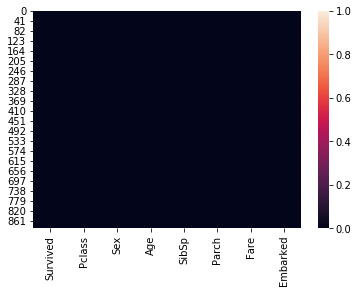

In [28]:
sns.heatmap(df.isna())

In [29]:
df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [38]:
df.drop(['Sex','Embarked'], axis = 1, inplace = True)

In [39]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [40]:
dataset = pd.concat([df,sex,embarked], axis = 1)

In [41]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [43]:
dataset.rename(columns={'male':'Sex'}, inplace=True)

In [44]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


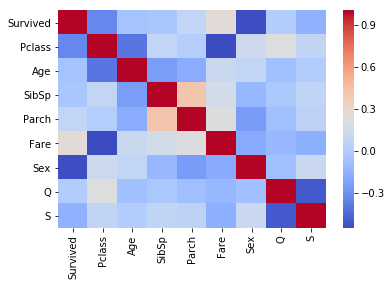

In [45]:
sns.heatmap(dataset.corr(), cmap = 'coolwarm')

In [46]:
dataset.drop('Fare', axis=1, inplace = True)

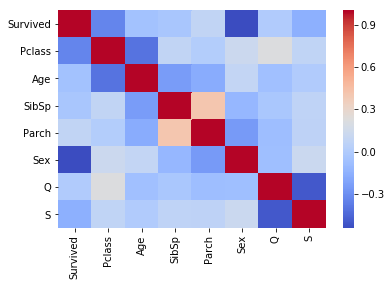

In [47]:
sns.heatmap(dataset.corr(), cmap = 'coolwarm')

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
y = dataset['Survived']

In [50]:
X = dataset.iloc[:,1:]

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Pclass    889 non-null int64
Age       889 non-null float64
SibSp     889 non-null int64
Parch     889 non-null int64
Sex       889 non-null uint8
Q         889 non-null uint8
S         889 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 37.3 KB


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 324 to 318
Data columns (total 7 columns):
Pclass    622 non-null int64
Age       622 non-null float64
SibSp     622 non-null int64
Parch     622 non-null int64
Sex       622 non-null uint8
Q         622 non-null uint8
S         622 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 26.1 KB


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 299 to 74
Data columns (total 7 columns):
Pclass    267 non-null int64
Age       267 non-null float64
SibSp     267 non-null int64
Parch     267 non-null int64
Sex       267 non-null uint8
Q         267 non-null uint8
S         267 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 11.2 KB


In [55]:
len(y_test)

267

In [56]:
len(y_train)

622